Feature Engineering
1. Description by preliminary statistics, histogram, plots
2. Try regression with single feature
3. Try regression with multiple features
4. Feature engineering: convert some variables into categorical values and further one hot encoding
5. Test the change of RMSE with aspect to the number of bins
6. Try Cross-features

In [1]:
import numpy as np
import pandas as pd

In [2]:
"""california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv",
                                           sep=",")

# We'll randomize the data, just to be sure not to get any pathological ordering effects
# that might harm the performance of Stochastic Gradient Descent.
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

# We'll scale `median_house_value` to be in units of thousands,
# so it can be learned a little more easily with learning rtes in a range that we usually use.
california_housing_dataframe["median_house_value"] /= 1000.0"""

'california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv",\n                                           sep=",")\n\n# We\'ll randomize the data, just to be sure not to get any pathological ordering effects\n# that might harm the performance of Stochastic Gradient Descent.\ncalifornia_housing_dataframe = california_housing_dataframe.reindex(\n    np.random.permutation(california_housing_dataframe.index))\n\n# We\'ll scale `median_house_value` to be in units of thousands,\n# so it can be learned a little more easily with learning rtes in a range that we usually use.\ncalifornia_housing_dataframe["median_house_value"] /= 1000.0'

In [3]:
"""
Revision Timestamp:  8:01:09 SGT Thursday, 17 August 2022
Revision by: Yu Ta
Notes: (1) I can not retreive the data from the url, so load the data from a local folder. (2)np.random ==> np.random.RandomState(seed=1)
"""
try:
    california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv",
          sep=",")  # get the data from the website
except:
    california_housing_dataframe = pd.read_csv("california_housing_train.csv",
          sep=",")  # if fail, get the data from the local folder; need to specify your directory here

# We'll randomize the data, just to be sure not to get any pathological ordering effects
# that might harm the performance of Stochastic Gradient Descent.
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.RandomState(seed=1).permutation(california_housing_dataframe.index))

# We'll scale `median_house_value` to be in units of thousands,
# so it can be learned a little more easily with learning rtes in a range that we usually use.
california_housing_dataframe["median_house_value"] /= 1000.0

In [4]:
california_housing_dataframe.shape

(17000, 9)

In [ ]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4752,-118.08,33.85,19.0,4261.0,678.0,2621.0,661.0,6.2427,288.7
13348,-121.93,37.73,23.0,2564.0,347.0,1043.0,351.0,6.2048,275.0
13459,-121.95,37.32,39.0,1164.0,199.0,619.0,231.0,4.6304,263.2
6691,-118.29,34.07,22.0,492.0,269.0,634.0,261.0,1.6406,300.0
12750,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165.0


## Examine the data

It's a good idea to get to know your data a little bit before you work with it.

We'll print out a quick summary of a few useful statistics on each column: count of examples, mean, standard deviation, max, min, and various quantiles.

In [ ]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

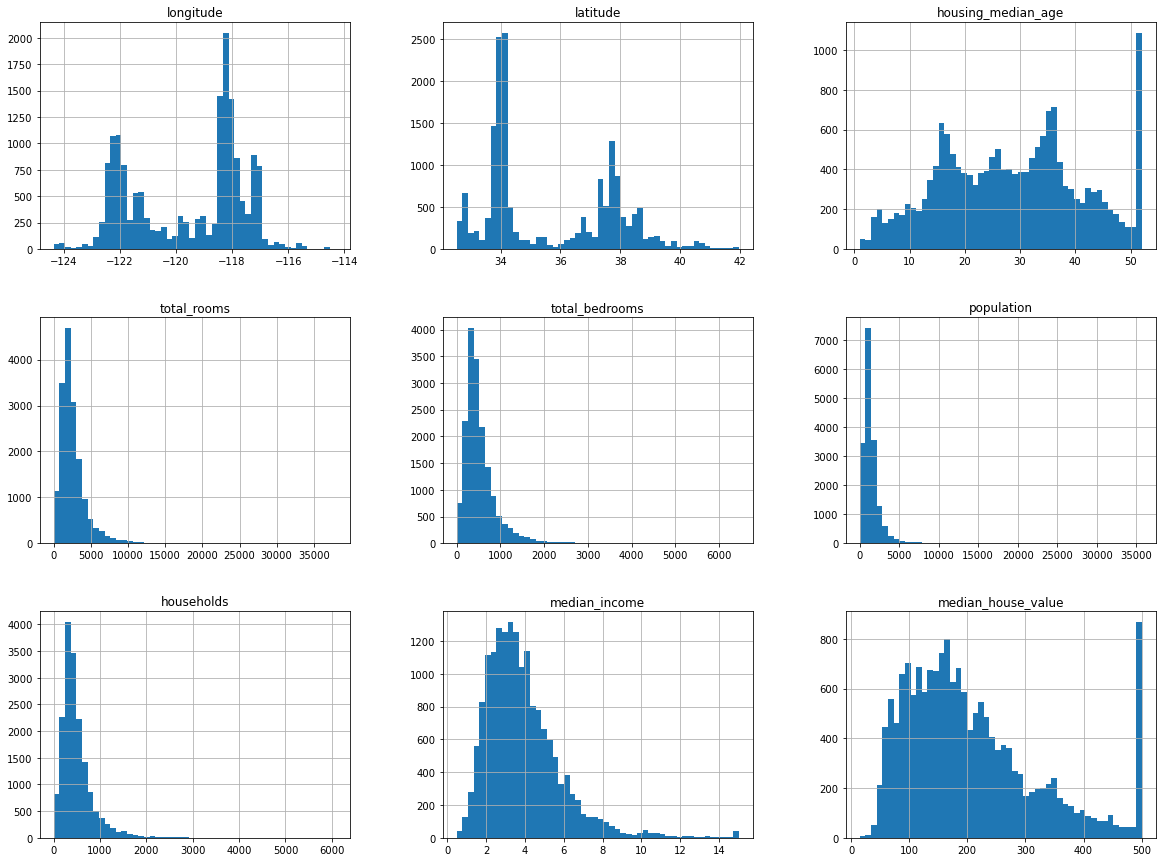

In [ ]:
california_housing_dataframe.hist(bins=50, figsize=(20,15))

### Build the First Model
Let's try to predict the median_house_value by using only total_rooms as the feature.

**Note**: Our data is at the city block level, so this feature represents the total number of rooms in that block.



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california_housing_dataframe.drop('median_house_value', axis=1),
                                                    california_housing_dataframe['median_house_value'],
                                                    test_size=0.1,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(15300, 8)
(1700, 8)


## Let's plot a scatter plot between the mdeian_house_value and the total_rooms

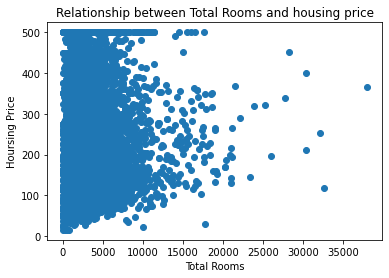

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['total_rooms'], y_train)
plt.xlabel('Total Rooms')
plt.ylabel('Hoursing Price')
plt.title('Relationship between Total Rooms and housing price')
plt.show()

## Let's try using total_rooms for prediction

In [ ]:
from sklearn.linear_model import LinearRegression

# Creates a LinearRegression object (Ordinary least squares Linear Regression)
lm = LinearRegression()

lm.fit(X_train[['total_rooms']], y_train)

LinearRegression()

In [ ]:
# Compute MSE
def mse(y_predicted, y_true):
  return np.mean(np.square(y_predicted - y_true))

mse_training = mse(lm.predict(X_train[['total_rooms']]), y_train)
mse_testing = mse(lm.predict(X_test[['total_rooms']]), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 13281.217066475458, testing mse: 12681.084631861055
training rmse: 115.24416283038138, testing rmse: 112.61032204847412


In [ ]:
california_housing_dataframe[['median_house_value']].describe()

,median_house_value
count,17000.000000
mean,207.300912
std,115.983764
min,14.999000
25%,119.400000
50%,180.400000
75%,265.000000
max,500.001000


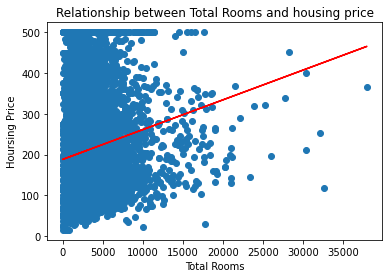

In [ ]:
plt.scatter(X_train['total_rooms'], y_train)
plt.xlabel('Total Rooms')
plt.ylabel('Hoursing Price')
plt.title('Relationship between Total Rooms and housing price')
plt.plot(X_train['total_rooms'], lm.predict(X_train[['total_rooms']]), color='red')
plt.show()

## Let's try using income

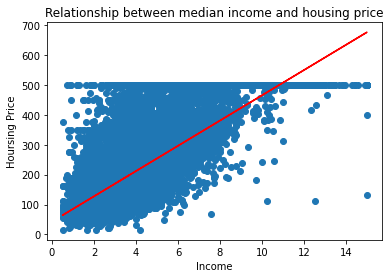

In [ ]:
lm.fit(X_train[['median_income']], y_train)

plt.scatter(X_train['median_income'], y_train)
plt.xlabel('Income')
plt.ylabel('Hoursing Price')
plt.title('Relationship between median income and housing price')
plt.plot(X_train['median_income'], lm.predict(X_train[['median_income']]), color='red')
plt.show()

In [ ]:
mse_training = mse(lm.predict(X_train[['median_income']]), y_train)
mse_testing = mse(lm.predict(X_test[['median_income']]), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 6996.902802319143, testing mse: 7153.9342711298605
training rmse: 83.6474913091788, testing rmse: 84.58093325998395


## Let's try using more features

In [ ]:
california_housing_dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
features = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'latitude', 'longitude']

lm.fit(X_train[features], y_train)

mse_training = mse(lm.predict(X_train[features]), y_train)
mse_testing = mse(lm.predict(X_test[features]), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 4756.6268677586895, testing mse: 5518.548602193328
training rmse: 68.96830335566251, testing rmse: 74.28693426298685


In [ ]:
pd.DataFrame([x for x in zip(features, lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,housing_median_age,1.140062
1,total_rooms,-0.007421
2,total_bedrooms,0.111769
3,population,-0.044762
4,households,0.063085
5,median_income,40.410947
6,latitude,-42.951257
7,longitude,-43.046707


## Let's try to do some feature engineering

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14525,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458
2765,-117.70,33.59,11.0,8039.0,1717.0,3445.0,1571.0,4.1678
5201,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795
10237,-119.94,37.04,14.0,1636.0,253.0,766.0,225.0,3.1250
7106,-118.32,33.99,43.0,1257.0,232.0,735.0,232.0,3.7167


Generate categorical features that split longitude and latitude values into 10 categories (default value 10)

In [ ]:
# Compute the histogram for longitude and latitude
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

In [ ]:
# display the boundaries in splitting letitude data
for idx, item in enumerate(latitude_boundaries):
  print (idx, item)

0 32.54
1 33.481
2 34.422
3 35.363
4 36.304
5 37.245000000000005
6 38.186
7 39.127
8 40.068000000000005
9 41.009
10 41.95


In [ ]:
X_train.describe()['latitude'].loc[['min', 'max']]

min    32.54
max    41.95
Name: latitude, dtype: float64

In [ ]:
def assign_bucket(x, ranges):
  if x <= ranges[0]:
    return 0

  for i in range(1, len(ranges) - 1):
    if x <= ranges[i]:
      return i - 1

  return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [ ]:
X_train['lat_discrete'].value_counts().sort_index()

0    1342
1    6690
2     542
3     343
4     951
5    3493
6    1280
7     369
8     235
9      55
Name: lat_discrete, dtype: int64

In [ ]:
X_test['lat_discrete'].value_counts().sort_index()

0    156
1    729
2     70
3     39
4     98
5    385
6    150
7     34
8     29
9     10
Name: lat_discrete, dtype: int64

In [ ]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,lgt_discrete,lat_discrete
count,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000
mean,-119.560190,35.624952,28.597712,2644.604052,539.401699,1428.343529,501.354183,3.886031,4.337516,2.791503
std,2.003308,2.135410,12.599039,2187.062475,421.823617,1124.439242,385.131081,1.914295,2.044908,2.271190
min,-124.350000,32.540000,1.000000,2.000000,1.000000,6.000000,1.000000,0.499900,0.000000,0.000000
25%,-121.780000,33.930000,18.000000,1459.750000,296.000000,790.000000,281.000000,2.563850,2.000000,1.000000
50%,-118.490000,34.250000,29.000000,2125.000000,433.000000,1165.000000,408.000000,3.549250,5.000000,1.000000
75%,-118.000000,37.720000,37.000000,3153.000000,650.000000,1721.000000,606.000000,4.772150,6.000000,5.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,9.000000,9.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']])
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']])

In [ ]:
features_lat_lgn_train.shape, features_lat_lgn_test.shape

((15300, 20), (1700, 20))

In [ ]:
print(features_lat_lgn_test[1699])

  (0, 5)	1.0
  (0, 11)	1.0


In [ ]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

In [ ]:
OHE_train.shape

(15300, 26)

In [ ]:
lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 4548.21268135489, testing mse: 5068.73890056489
training rmse: 67.44043802760248, testing rmse: 71.19507637867166


In [ ]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(20)], lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,housing_median_age,0.875070
1,total_rooms,-0.005201
2,total_bedrooms,0.089284
3,population,-0.042559
4,households,0.065535
5,median_income,38.678596
6,0,107.224415
7,1,147.947329
8,2,90.918828
9,3,50.780307


In [ ]:
# Reduce the number of buckets to 5

bins_considered = range(5, 50)
train_rmse, test_rmse = [], []

for number_bin in bins_considered:
  # print ('# of bins: %d' %number_bin)
  _, longitude_boundaries = np.histogram(X_train['longitude'], bins=number_bin)
  _, latitude_boundaries = np.histogram(X_train['latitude'], bins=number_bin)

  X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
  X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
  X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
  X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

  # One hot encoding
  features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']])
  features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']])

  # Concatenate features
  OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
  OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

  lm.fit(OHE_train, y_train)

  mse_training = mse(lm.predict(OHE_train), y_train)
  mse_testing = mse(lm.predict(OHE_test), y_test)

  train_rmse.append(np.sqrt(mse_training))
  test_rmse.append(np.sqrt(mse_testing))

Text(0.5, 1.0, 'Relationship between RMSE and number of bins')

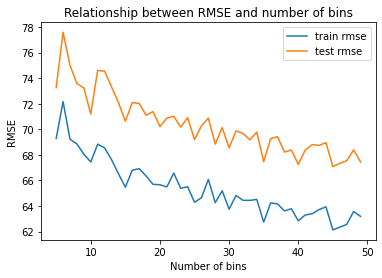

In [ ]:
plt.plot(bins_considered, train_rmse)
plt.plot(bins_considered, test_rmse)
plt.legend(['train rmse', 'test rmse'])
plt.xlabel('Number of bins')
plt.ylabel('RMSE')
plt.title('Relationship between RMSE and number of bins')

## Add feature cross

In [ ]:
no_bins=5

_, longitude_boundaries = np.histogram(X_train['longitude'], bins=no_bins)
_, latitude_boundaries = np.histogram(X_train['latitude'], bins=no_bins)

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

#the number of combinations of lgt_discrete and lat_discrete would be no_bins*no_bins=25

X_train['cross_lgt_lat_discrete'] = X_train['lgt_discrete'] * no_bins + X_train['lat_discrete']
X_test['cross_lgt_lat_discrete'] = X_test['lgt_discrete'] * no_bins + X_test['lat_discrete']

# Use the label encoder to convert the values to zero-based
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit_transform() is used on the training data so that we can scale the training data
# and also learn the scaling parameters of that data.
X_train['cross_lgt_lat_discrete'] = le.fit_transform(X_train['cross_lgt_lat_discrete'])
# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test['cross_lgt_lat_discrete'] = le.transform(X_test['cross_lgt_lat_discrete'])
#X_train['lgt_lat_discrete'].describe()
X_train['cross_lgt_lat_discrete'].value_counts(sort=False,ascending=True)/len(X_train['cross_lgt_lat_discrete'])

4     0.205621
12    0.398562
9     0.039085
0     0.045359
7     0.115882
13    0.012092
5     0.077582
6     0.006667
1     0.024706
2     0.012092
8     0.031895
15    0.010523
3     0.013268
10    0.005490
14    0.000392
16    0.000588
11    0.000196
Name: cross_lgt_lat_discrete, dtype: float64

In [ ]:
# One hot encoding
features_cross_lat_lgn_train = enc.fit_transform(X_train[['cross_lgt_lat_discrete']])
features_cross_lat_lgn_test = enc.transform(X_test[['cross_lgt_lat_discrete']])

features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
# Concatenate features
OHE_train = np.hstack((X_train[features].values, features_cross_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test[features].values, features_cross_lat_lgn_test.toarray()))

lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}\n".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

# check the number of features generated by one hot encoding
features_lat_lgn_train.shape
# check the number of features fed into the model
lm.coef_

training mse: 4698.299237679502, testing mse: 5257.2112048419085
training rmse: 68.54414079758752, testing rmse: 72.50662869587792



array([ 9.85420040e-01, -8.22631165e-03,  5.53960077e-02, -4.03492910e-02,
        1.12455806e-01,  4.02422465e+01,  1.16040580e+02,  2.43313841e+01,
       -3.29294856e+01,  3.95166340e+01,  3.53364390e+01, -1.76705170e+01,
       -3.33203919e+01,  8.73913496e+01, -3.43012361e+00, -3.84762505e+01,
        4.80363632e+00, -7.18388298e+01,  3.29480274e+01, -2.55155030e+01,
       -3.64532864e+01, -2.88106255e+01, -5.19230368e+01])

In [ ]:
train_rmse[0], test_rmse[0]

(69.27215415614049, 73.25288413248248)

In [ ]:
# The best performance so far:
print ("Number of bins: {}".format(number_bin))
train_rmse[-1], test_rmse[-1]

Number of bins: 49


(63.18729183464807, 67.43804891979282)

In [ ]:
"""
Revision Timestamp:  8:02:05 SGT Thursday, 17 August 2022
Revision by: Yu Ta
Notes: package version checks
"""
import session_info
session_info.show()

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']